# Lending Club Data Analysis

## Import libraries

In [1]:
import pandas as pd
import numpy as np

#Plots
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


## Load the data

In [2]:
data= pd.read_csv('loan.csv', engine='python')
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Initial look at data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
data.shape

(39717, 111)

In [5]:
pd.set_option('display.max_rows', 111)

In [6]:
#Percent of nulls in data
round(100*(data.isnull().sum()/data.shape[0]))

id                                  0.0
member_id                           0.0
loan_amnt                           0.0
funded_amnt                         0.0
funded_amnt_inv                     0.0
term                                0.0
int_rate                            0.0
installment                         0.0
grade                               0.0
sub_grade                           0.0
emp_title                           6.0
emp_length                          3.0
home_ownership                      0.0
annual_inc                          0.0
verification_status                 0.0
issue_d                             0.0
loan_status                         0.0
pymnt_plan                          0.0
url                                 0.0
desc                               33.0
purpose                             0.0
title                               0.0
zip_code                            0.0
addr_state                          0.0
dti                                 0.0


In [7]:
#Drop all column with 100% Null values
data=data.dropna(how='all', axis=1)
data.shape

(39717, 57)

In [112]:
#Columns left 
round(100*(data.isnull().sum()/data.shape[0]))

id                            0.0
member_id                     0.0
loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
term                          0.0
int_rate                      0.0
installment                   0.0
grade                         0.0
sub_grade                     0.0
emp_length                    0.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_d                       0.0
loan_status                   0.0
pymnt_plan                    0.0
url                           0.0
purpose                       0.0
title                         0.0
zip_code                      0.0
addr_state                    0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_cr_line              0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec                       0.0
revol_bal                     0.0
revol_util    

In [9]:
#We only need: Amount Requested, Application Date, Loan Title, Risk_Score, Debt-To-Income Ratio, Zip Code, State
#Employment Length and Policy Code to calculate the reject value. 
#From these we can drop desc, next_pymnt_d
#emp_title, mths_since_last_delinq and mths_since_last_record since they have a high percent of missing values.

data=data.drop(['desc', 'next_pymnt_d','emp_title','mths_since_last_record','mths_since_last_delinq'], axis=1)

In [10]:
data=data.dropna()
data=data.reset_index(drop=True)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


## Column info 

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37823 entries, 0 to 37822
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          37823 non-null  int64  
 1   member_id                   37823 non-null  int64  
 2   loan_amnt                   37823 non-null  int64  
 3   funded_amnt                 37823 non-null  int64  
 4   funded_amnt_inv             37823 non-null  float64
 5   term                        37823 non-null  object 
 6   int_rate                    37823 non-null  object 
 7   installment                 37823 non-null  float64
 8   grade                       37823 non-null  object 
 9   sub_grade                   37823 non-null  object 
 10  emp_length                  37823 non-null  object 
 11  home_ownership              37823 non-null  object 
 12  annual_inc                  37823 non-null  float64
 13  verification_status         378

## Look at data by column

### Employment Length

In [12]:
#Replace the objects
data['emp_length']=data['emp_length'].str.replace('+','')

In [13]:
#Used 0 years for less than a year
data['emp_length']=data['emp_length'].str.replace('<','0')

In [14]:
data.emp_length.value_counts()

10 years    8749
0 1 year    4396
2 years     4291
3 years     4023
4 years     3375
5 years     3233
1 year      3132
6 years     2192
7 years     1746
8 years     1449
9 years     1237
Name: emp_length, dtype: int64

In [15]:
#Split the data to keep the integer
data['emp_length']=data['emp_length'].apply(lambda x: str(x).split(' ')[0])

In [16]:
data.emp_length.value_counts()

10    8749
0     4396
2     4291
3     4023
4     3375
5     3233
1     3132
6     2192
7     1746
8     1449
9     1237
Name: emp_length, dtype: int64

### Term 

In [17]:
#Delete the word months
data['term']=data['term'].str.replace('months','').astype(int)

In [18]:
data.term.value_counts()

36    27489
60    10334
Name: term, dtype: int64

### Interest Rate

In [19]:
data['int_rate']=data['int_rate'].str.replace('%','').astype('float')

In [20]:
data.int_rate.value_counts()

10.99    932
13.49    811
11.49    795
7.51     755
7.88     701
        ... 
10.46      1
10.91      1
20.52      1
16.20      1
17.44      1
Name: int_rate, Length: 336, dtype: int64

### Revolving credit utilization (revol_util)

In [21]:
data['revol_util']=data['revol_util'].str.replace('%','').astype('float')

In [22]:
data.revol_util.value_counts()

0.00     904
0.20      59
63.00     56
66.60     56
40.70     56
        ... 
18.82      1
24.66      1
88.48      1
33.26      1
11.62      1
Name: revol_util, Length: 1087, dtype: int64

## Create new columns by splitting data

### Issued Month and Year

In [23]:
data['issue_month']=data['issue_d'].apply(lambda x: str(x).split('-')[0])

In [24]:
data['issue_year']=data['issue_d'].apply(lambda x: x.split('-')[1])

### Oldest credit line month and year

In [25]:
data['credit_oldest_month']=data['earliest_cr_line'].apply(lambda x: str(x).split('-')[0])

In [26]:
data['credit_oldest_year']=data['earliest_cr_line'].apply(lambda x: str(x).split('-')[1])

In [27]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,issue_month,issue_year,credit_oldest_month,credit_oldest_year
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,INDIVIDUAL,0,0.0,0,0.0,0.0,Dec,11,Jan,85
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,INDIVIDUAL,0,0.0,0,0.0,0.0,Dec,11,Apr,99
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,INDIVIDUAL,0,0.0,0,0.0,0.0,Dec,11,Nov,01
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,INDIVIDUAL,0,0.0,0,0.0,0.0,Dec,11,Feb,96
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,INDIVIDUAL,0,0.0,0,0.0,0.0,Dec,11,Jan,96


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37823 entries, 0 to 37822
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          37823 non-null  int64  
 1   member_id                   37823 non-null  int64  
 2   loan_amnt                   37823 non-null  int64  
 3   funded_amnt                 37823 non-null  int64  
 4   funded_amnt_inv             37823 non-null  float64
 5   term                        37823 non-null  int64  
 6   int_rate                    37823 non-null  float64
 7   installment                 37823 non-null  float64
 8   grade                       37823 non-null  object 
 9   sub_grade                   37823 non-null  object 
 10  emp_length                  37823 non-null  object 
 11  home_ownership              37823 non-null  object 
 12  annual_inc                  37823 non-null  float64
 13  verification_status         378

In [29]:
data['issue_year']=data.issue_year.astype(int)
data['credit_oldest_year']=data.credit_oldest_year.astype(int)

### Apply a function to convert to 4 digit year

In [30]:
data['issue_year']=data['issue_year'].apply(lambda x:  x + 2000)

In [31]:
data['credit_oldest_year']=data['credit_oldest_year'].apply(lambda x:  x + 1900 if (x>=11 and x<=99) else x+2000)

In [32]:
data.issue_year.value_counts()

2011    20857
2010    11170
2009     4687
2008     1104
2007        5
Name: issue_year, dtype: int64

In [33]:
data.credit_oldest_year.value_counts()

2000    3121
1999    2868
1998    2741
2001    2438
1997    2354
1996    2183
1995    2054
1994    1932
2002    1848
2003    1787
2004    1696
2005    1444
1993    1439
2006    1119
1992    1008
1990     979
1991     927
1989     813
1988     699
2007     685
1987     593
1986     468
1985     429
1984     375
1983     316
1982     202
1981     164
1980     162
2008     149
1979     145
1978     140
1977     101
1976      77
1975      66
1974      55
1973      47
1971      39
1972      38
1970      37
1969      26
1967      15
1968      14
1966       8
1965       7
1964       4
1963       4
1962       3
1956       1
1954       1
1950       1
1946       1
Name: credit_oldest_year, dtype: int64

### Years with credit line at time of loan

In [34]:
data['credit_years']=data['issue_year']-data['credit_oldest_year']

In [35]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,issue_month,issue_year,credit_oldest_month,credit_oldest_year,credit_years
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,0,0.0,0,0.0,0.0,Dec,2011,Jan,1985,26
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,0,0.0,0,0.0,0.0,Dec,2011,Apr,1999,12
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,0,0.0,0,0.0,0.0,Dec,2011,Nov,2001,10
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,0,0.0,0,0.0,0.0,Dec,2011,Feb,1996,15
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,0,0.0,0,0.0,0.0,Dec,2011,Jan,1996,15


### Estimate Age at time of loan (assumming oldest credit line was taken at 20 yrs old)

In [36]:
data['age']=data['credit_years'] + 20

In [37]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,issue_month,issue_year,credit_oldest_month,credit_oldest_year,credit_years,age
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,0.0,0,0.0,0.0,Dec,2011,Jan,1985,26,46
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,0.0,0,0.0,0.0,Dec,2011,Apr,1999,12,32
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,0.0,0,0.0,0.0,Dec,2011,Nov,2001,10,30
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,0.0,0,0.0,0.0,Dec,2011,Feb,1996,15,35
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,0.0,0,0.0,0.0,Dec,2011,Jan,1996,15,35


In [38]:
data.age.value_counts()

31    3086
32    2761
30    2736
33    2563
34    2280
29    2118
35    2106
36    1879
28    1849
27    1773
26    1632
37    1627
25    1417
38    1187
24    1067
39    1015
40     926
41     865
42     722
43     631
44     528
45     438
23     413
46     384
47     317
48     270
49     191
50     152
52     151
51     148
53     105
54      95
55      72
56      54
57      54
58      40
59      37
60      35
61      31
62      19
63      14
64       9
65       7
66       6
68       4
67       4
81       1
85       1
75       1
76       1
69       1
Name: age, dtype: int64

# Initial Plots

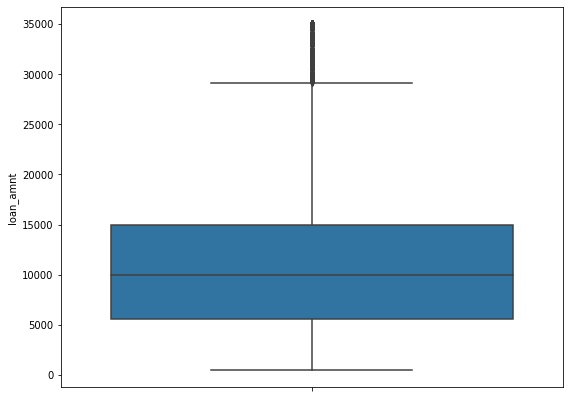

In [40]:
#With no nulls, we can do preliminary plots
#plots
#Loan Amounts
plt.figure(figsize=[9,7])
sns.boxplot(y=data.loan_amnt)
plt.show()

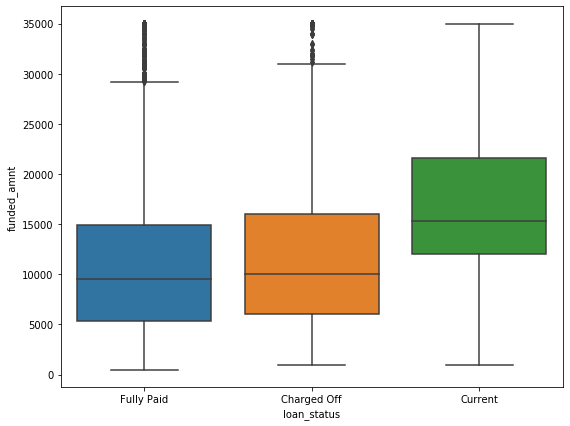

In [41]:
plt.figure(figsize=[9,7])
sns.boxplot(data.loan_status,data.funded_amnt)
plt.show()

<Figure size 648x504 with 0 Axes>

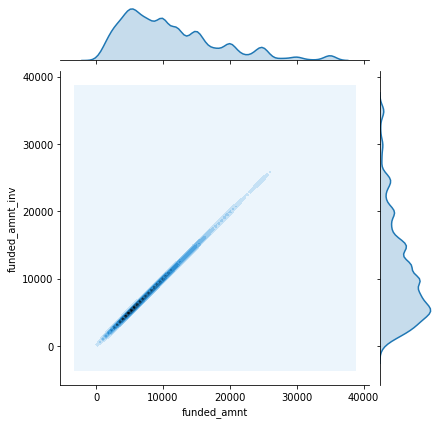

In [42]:
plt.figure(figsize=[9,7])
sns.jointplot(data.funded_amnt, data.funded_amnt_inv, kind="kde")
plt.show()

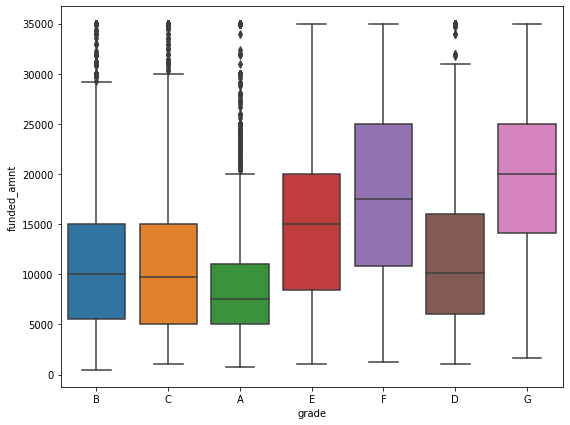

In [43]:
# Funded amount vs Grade
plt.figure(figsize=[9,7])
sns.boxplot(data.grade,data.funded_amnt)
plt.show()

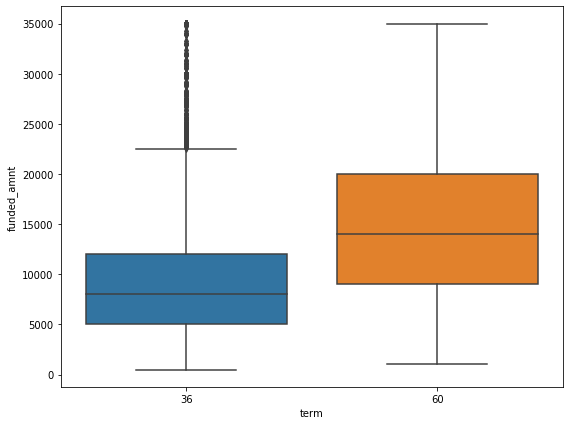

In [44]:
#Funded amount and terms
plt.figure(figsize=[9,7])
sns.boxplot(data.term,data.funded_amnt)
plt.show()

# Data Slicing for analysis

In [45]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'issue_month', 'issue_year',
       'credit_oldest_month', 'credit_oldest_year', 'credit_years'

## Defaulted

In [46]:
pd.set_option('display.max_rows',None)

In [47]:
defaulted= data.loc[(data['loan_status']=='Charged Off')]
defaulted.shape

(5201, 58)

In [48]:
defaulted.groupby(['addr_state','annual_inc'])['funded_amnt'].agg(['count', 'sum'])

count     sum
addr_state annual_inc               
AK         36000.00        1    4000
           39000.00        1    7650
           45000.00        1    5000
           49960.00        1   25000
           56000.00        1   17500
           59000.00        1   20000
           60000.00        1    6000
           64000.00        1   16000
           66362.04        1   25000
           67000.00        1   25000
           72000.00        1    8400
           80000.00        1   10000
           85000.00        1    9325
           184000.00       1   20000
           540000.00       1    3000
AL         15000.00        1    4000
           19012.80        1    3500
           22800.00        1    8000
           24449.16        1    1800
           27000.00        1    5000
           29268.00        1    5000
           29550.00        1    7000
           30000.00        3   34000
           30160.00        1   12000
           31200.00        1    6000
           32000.00        1   12000
           34560.00        1    7550
           35000.00        2   10000
           37008.00        1   12000
           37440.00        1   16950
           38400.00        1   16450
           40000.00        1    2600
           43500.00        1   21750
           45000.00        1   10000
           45600.00        1    8400
           48000.00        1    2000
           49000.00        1   22000
           50000.00        1    4500
           52000.00        3   55025
           53000.00        2   51000
           56000.00        1    7500
           58000.00        1    7000
           59000.00        1   24575
           60000.00        2   27425
           61938.00        1   18400
           65000.00        1    3200
           65642.00        1   24000
           69508.00        1    2500
           75000.00        2   70000
           87000.00        1   25000
           99996.00        1    4200
           100000.00       1   15000
           112000.00       1   17000
           135996.00       1    8000
           150000.00       1   35000
           151016.08       1   25000
AR         14400.00        1    3000
           18000.00        1    1000
           19200.00        1    2000
           23587.00        1    2000
           24000.00        1    4750
           24840.00        1    1500
           27600.00        1    8000
           31000.00        1    2400
           34800.00        1    1675
           36000.00        1    9000
           38000.00        1   12600
           40000.00        1    9375
           47000.00        1   18000
           50000.00        1   18800
           52000.00        1   18250
           54600.00        1   12000
           63000.00        1   14000
           65000.00        1   17000
           66000.00        2   31175
           70000.00        1   12000
           75000.00        1   14275
           98000.00        1    5000
           108000.00       1   16300
           128000.00       1    5000
           200000.00       1   15300
AZ         13000.00        1    9250
           14400.00        1    5000
           15000.00        1    4800
           18000.00        2    5700
           18500.00        1    9000
           20800.00        1    7200
           21158.00        1    4000
           21340.00        1    8000
           21600.00        2    9500
           22800.00        1    2000
           24000.00        2   16250
           28800.00        1   11500
           30000.00        4   21150
           30204.00        1    8400
           30660.00        1   17050
           33000.00        2    8000
           34000.00        1    2000
           35004.00        1   12000
           36000.00        3   25125
           36400.00        1    9250
           37000.00        1   13000
           37440.00        1    2000
           38484.00        1    6250
           38496.00        1   14750
           40000.00        5   57625
           42000.00        

In [49]:
defaulted.annual_inc.describe()

count    5.201000e+03
mean     6.341675e+04
std      4.790024e+04
min      4.080000e+03
25%      3.840000e+04
50%      5.400000e+04
75%      7.500000e+04
max      1.250000e+06
Name: annual_inc, dtype: float64

### Age and Debt ratio comparison

In [50]:
state_dti=defaulted.groupby(['addr_state','dti'])['loan_amnt'].agg(['mean','count'])

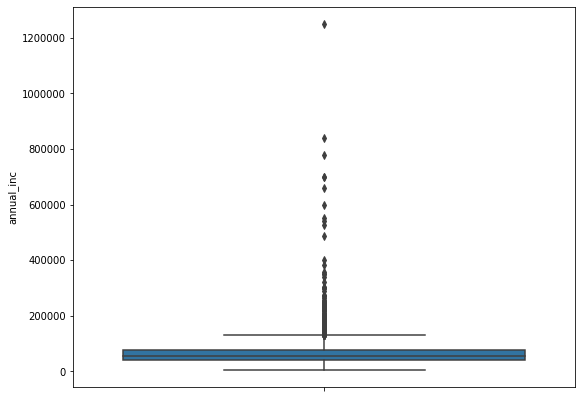

In [51]:
plt.figure(figsize=[9,7])
sns.boxplot(y=defaulted.annual_inc)
plt.show()

## Non-Default

In [52]:
non_default= data.loc[(data['loan_status']=='Fully Paid') | (data['loan_status']=='Current')]
non_default.shape

(32622, 58)

### Loan Data 

_d is used for clients that defaulted <br>
_nd is used for clients non default

In [53]:
loan_data_d=defaulted[['member_id','title','issue_month','issue_year', 'loan_amnt', 'funded_amnt','term', 'int_rate','installment',
         'loan_status', 'last_pymnt_d','pymnt_plan','out_prncp','recoveries']]
loan_data_d.describe()

,member_id,issue_year,loan_amnt,funded_amnt,term,int_rate,installment,out_prncp,recoveries
count,5.201000e+03,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,5201.000000,5201.0,5201.000000
mean,8.804708e+05,2010.412228,12293.433955,11926.624688,46.645645,13.925574,339.516268,0.0,687.771202
std,2.583625e+05,0.813844,8096.734468,7759.359919,11.924473,3.657039,215.858288,0.0,1749.200323
min,1.328890e+05,2007.000000,1000.000000,1000.000000,36.000000,5.420000,22.790000,0.0,0.000000
25%,6.951510e+05,2010.000000,6000.000000,6000.000000,36.000000,11.490000,172.380000,0.0,9.770000
50%,8.965240e+05,2011.000000,10000.000000,10000.000000,36.000000,13.790000,297.530000,0.0,182.760000
75%,1.070018e+06,2011.000000,17000.000000,16000.000000,60.000000,16.450000,460.100000,0.0,613.350000
max,1.314167e+06,2011.000000,35000.000000,35000.000000,60.000000,24.400000,1305.190000,0.0,29623.350000


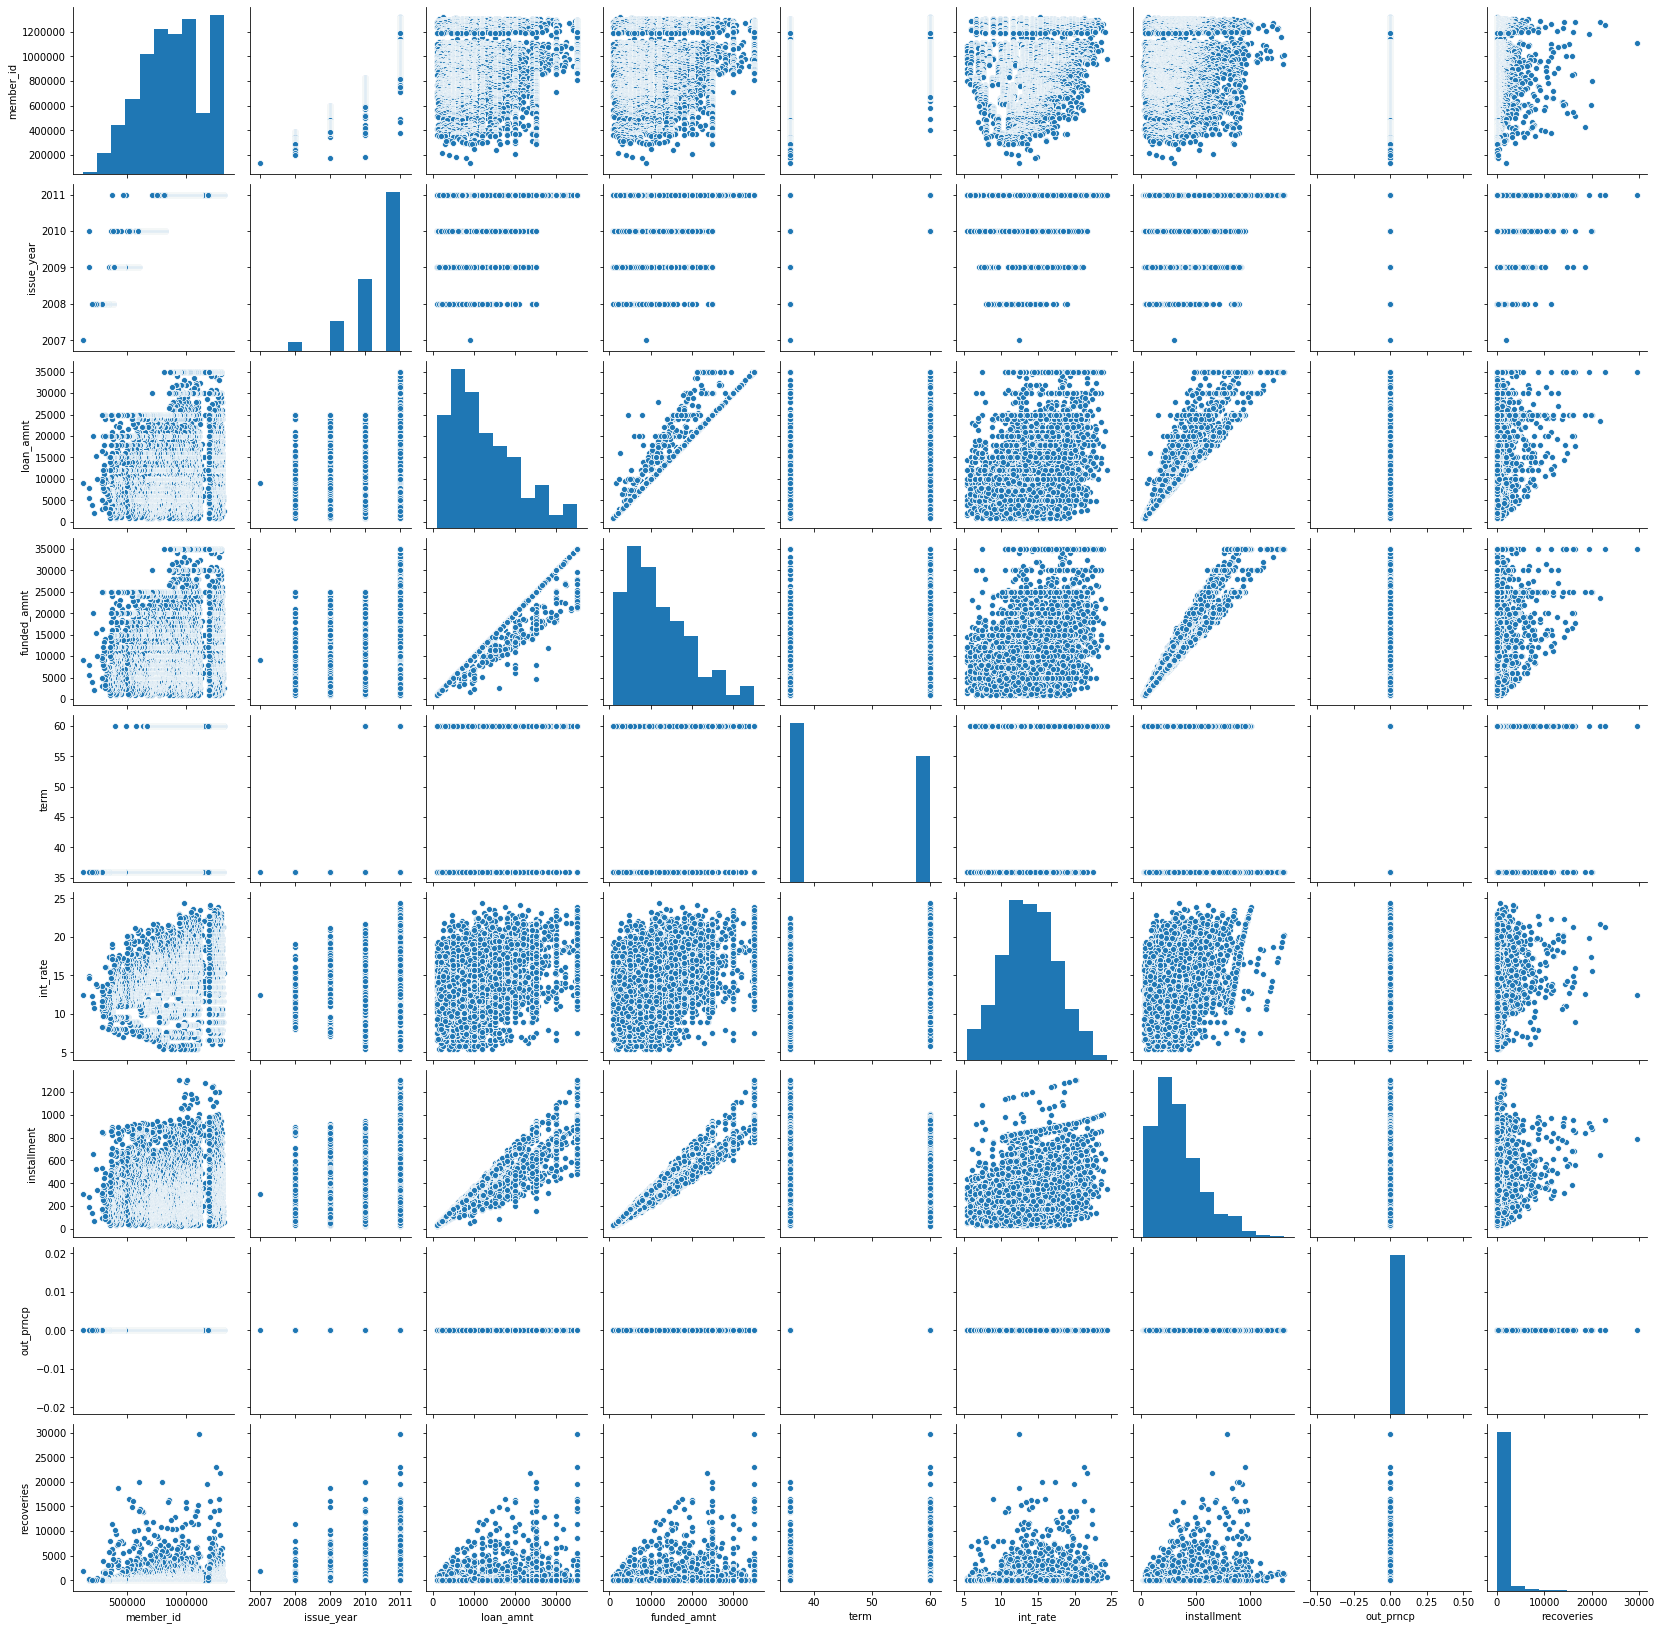

In [54]:
sns.pairplot(loan_data_d)
plt.show()

In [55]:
loan_data_nd=non_default[['member_id','title','issue_month','issue_year', 'loan_amnt', 'funded_amnt','term', 'int_rate','installment',
         'loan_status', 'last_pymnt_d','pymnt_plan','out_prncp','recoveries']]
loan_data_nd.describe()

,member_id,issue_year,loan_amnt,funded_amnt,term,int_rate,installment,out_prncp,recoveries
count,3.262200e+04,32622.000000,32622.000000,32622.000000,32622.000000,32622.000000,32622.000000,32622.000000,32622.0
mean,8.565588e+05,2010.361811,11175.111888,10911.393385,41.905463,11.774810,325.191173,60.682959,0.0
std,2.534272e+05,0.810074,7362.223795,7102.960827,10.337306,3.660838,207.935747,409.177456,0.0
min,8.036400e+04,2007.000000,500.000000,500.000000,36.000000,5.420000,16.080000,0.000000,0.0
25%,6.698392e+05,2010.000000,5500.000000,5500.000000,36.000000,8.900000,168.280000,0.000000,0.0
50%,8.501510e+05,2011.000000,10000.000000,9600.000000,36.000000,11.580000,281.015000,0.000000,0.0
75%,1.046296e+06,2011.000000,15000.000000,15000.000000,36.000000,14.250000,430.217500,0.000000,0.0
max,1.313524e+06,2011.000000,35000.000000,35000.000000,60.000000,24.590000,1295.210000,6311.470000,0.0


### Demographics

In [56]:
dem_d= defaulted[['member_id','age','emp_length','home_ownership', 'annual_inc', 'zip_code','addr_state']]        

In [57]:
dem_nd= non_default[['member_id','age','emp_length','home_ownership', 'annual_inc', 'zip_code','addr_state']]                    

### Credit History

In [58]:
credit_h_d= defaulted[['dti', 'delinq_2yrs', 'credit_oldest_month','credit_oldest_year','credit_years','inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 
                       'revol_util','total_acc','collections_12_mths_ex_med', 'policy_code', 
                       'chargeoff_within_12_mths', 'delinq_amnt','pub_rec_bankruptcies', 'tax_liens']]

In [59]:
credit_h_nd=non_default[['dti', 'delinq_2yrs', 'credit_oldest_month','credit_oldest_year','credit_years','inq_last_6mths', 'open_acc', 'pub_rec', 
                         'revol_bal', 'revol_util','total_acc','collections_12_mths_ex_med', 'policy_code', 
                         'chargeoff_within_12_mths', 'delinq_amnt','pub_rec_bankruptcies', 'tax_liens']]

# Plots

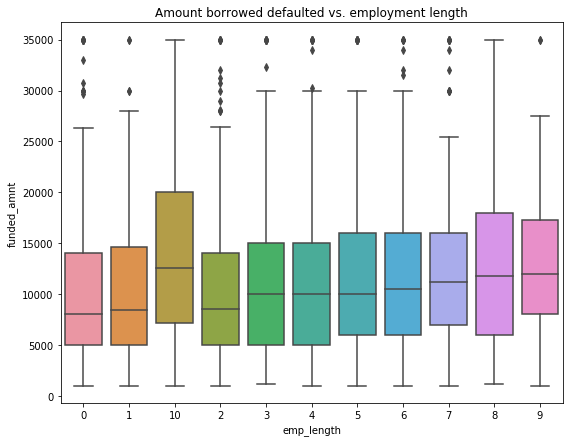

In [60]:
#Amount borrowed defaulted by employment length
plt.figure(figsize=[9,7])
sns.boxplot(dem_d.emp_length, loan_data_d.funded_amnt)
plt.title('Amount borrowed defaulted vs. employment length')
plt.show()

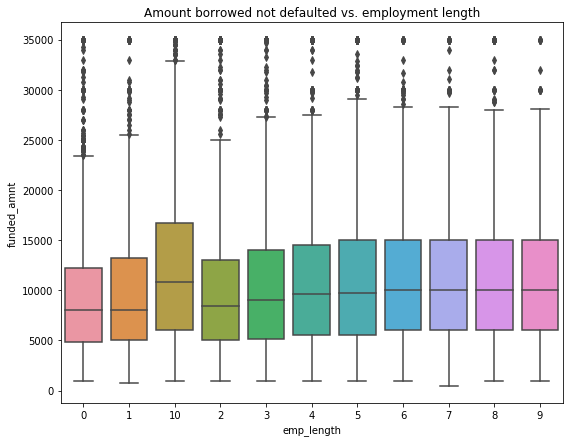

In [61]:
#Amount borrowed not defaulted by employment length
plt.figure(figsize=[9,7])
sns.boxplot(dem_nd.emp_length, loan_data_nd.funded_amnt)
plt.title('Amount borrowed not defaulted vs. employment length')
plt.show()

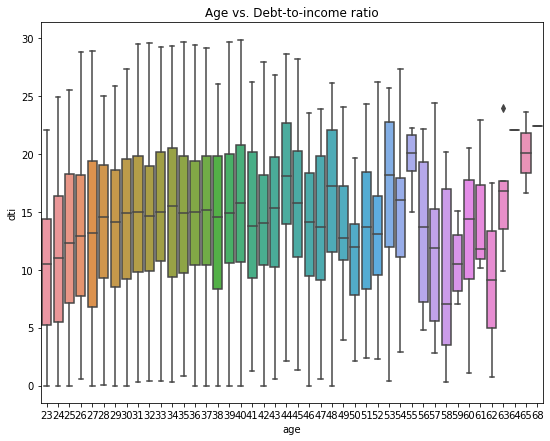

In [62]:
plt.figure(figsize=[9,7])
sns.boxplot(dem_d.age, credit_h_d.dti)
plt.title('Age vs. Debt-to-income ratio')
plt.show()

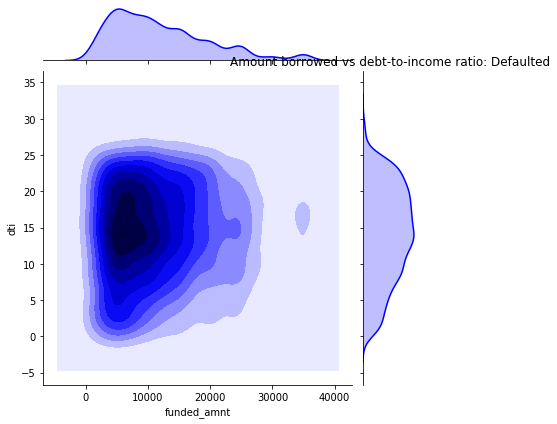

In [63]:
#Amount borrowed vs debt-to-income ratio

sns.jointplot(loan_data_d.funded_amnt, credit_h_d.dti, kind = 'kde',color = 'b')
plt.title('Amount borrowed vs debt-to-income ratio: Defaulted')
plt.show()

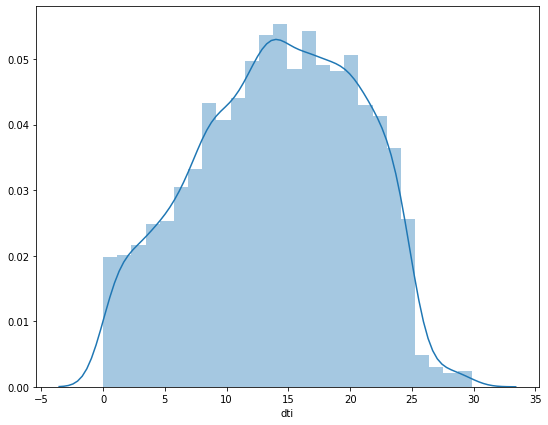

In [64]:
plt.figure(figsize=[9,7])
sns.distplot(defaulted.dti)
plt.show()

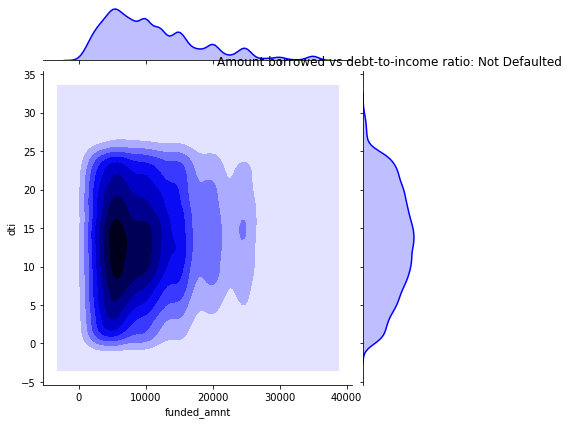

In [65]:
#Amount borrowed vs debt-to-income ratio not default
sns.jointplot(loan_data_nd.funded_amnt, credit_h_nd.dti, kind = 'kde',color = 'b')
plt.title('Amount borrowed vs debt-to-income ratio: Not Defaulted')
plt.show()

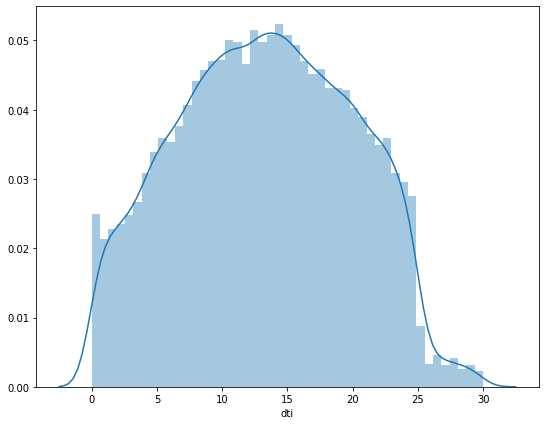

In [66]:
plt.figure(figsize=[9,7])
sns.distplot(non_default.dti)
plt.show()

In [67]:
#Loan status by year
pd.pivot_table(data=data, values="loan_amnt", index="issue_year", columns="loan_status", aggfunc=sum)

loan_status,Charged Off,Current,Fully Paid
issue_year,,,
2007,9000.0,NaN,36175.0
2008,1698425.0,NaN,7889475.0
2009,6090075.0,NaN,40102050.0
2010,15267500.0,NaN,104141950.0
2011,40873150.0,18866500.0,193518350.0


In [68]:
loan_stat_year=pd.pivot_table(data=data, values="loan_amnt", index="issue_year", columns="loan_status", aggfunc=sum)

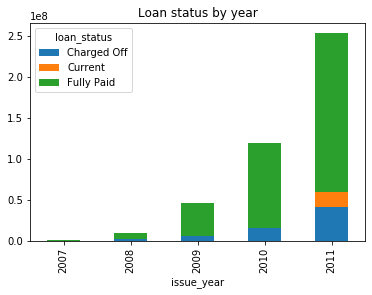

In [69]:
##Plot the stacked bar chart.
loan_stat_year.plot(kind="bar", stacked=True)
plt.title('Loan status by year')
plt.show()

In [99]:
data.dti.describe()

count    37823.000000
mean        13.377966
std          6.655886
min          0.000000
25%          8.270000
50%         13.470000
75%         18.630000
max         29.990000
Name: dti, dtype: float64

In [100]:
#Debt ratio by year
pd.pivot_table(data=data, values="dti", index="issue_year", columns="loan_status", aggfunc=np.median)

loan_status,Charged Off,Current,Fully Paid
issue_year,,,
2007,5.080,NaN,8.005
2008,13.730,NaN,12.140
2009,13.160,NaN,12.355
2010,14.035,NaN,13.000
2011,14.855,15.01,13.710


In [101]:
dti_year=pd.pivot_table(data=data, values="dti", index="issue_year", columns="loan_status", aggfunc=np.median)

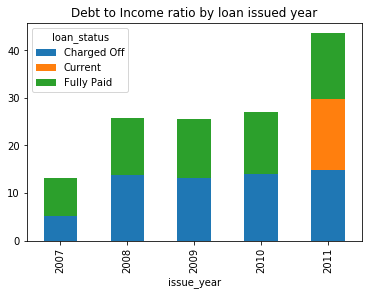

In [102]:
dti_year.plot(kind="bar", stacked=True)
plt.title('Debt to Income ratio by loan issued year')
plt.show()

In [97]:
#Loan amounts by age and status
pd.pivot_table(data=data, values="loan_amnt", index="age", columns="loan_status", aggfunc=sum)

loan_status,Charged Off,Current,Fully Paid
age,,,
23,463350.0,35000.0,1816850.0
24,1293825.0,99575.0,5617000.0
25,1969850.0,135125.0,8494300.0
26,2030000.0,318475.0,11408450.0
27,2222200.0,489650.0,13335550.0
28,2312300.0,502275.0,15016875.0
29,3088200.0,572325.0,18138675.0
30,4351350.0,861575.0,23908950.0
31,6028125.0,1395050.0,27327450.0


In [87]:
amount_age=pd.pivot_table(data=data, values="loan_amnt", index="age", columns="loan_status", aggfunc=sum)

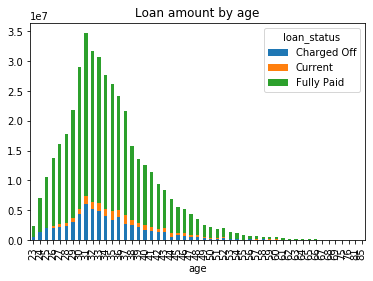

In [88]:
amount_age.plot(kind="bar", stacked=True)
plt.title('Loan amount by age')
plt.show()

In [105]:
#Debt to income ratio by age and status
pd.pivot_table(data=data, values="dti", index="age", columns="loan_status", aggfunc=np.mean)

loan_status,Charged Off,Current,Fully Paid
age,,,
23,9.850411,9.170000,9.689371
24,11.117158,8.076923,10.295901
25,12.308216,11.557857,11.725120
26,12.983927,10.918400,12.572428
27,13.112844,12.564412,13.201617
28,13.936223,14.232143,13.205559
29,13.449331,15.051111,13.454650
30,14.206795,14.920508,13.662217
31,14.368108,15.188444,13.600974


In [106]:
dti_age=pd.pivot_table(data=data, values="dti", index="age", columns="loan_status", aggfunc=np.mean)

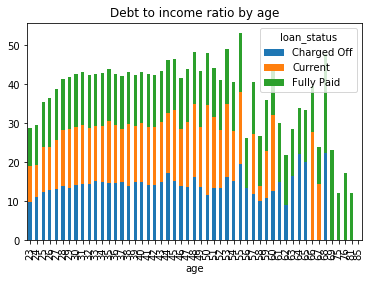

In [107]:
dti_age.plot(kind="bar", stacked=True)
plt.title('Debt to income ratio by age')
plt.show()

In [108]:
#Debt to income ratio by State and status
pd.pivot_table(data=data, values="dti", index="addr_state", columns="loan_status", aggfunc=np.mean)

loan_status,Charged Off,Current,Fully Paid
addr_state,,,
AK,14.887333,23.970000,14.880500
AL,14.222449,16.936250,14.045583
AR,16.455000,16.348889,15.135228
AZ,13.596283,16.443929,12.990753
CA,13.569913,14.028112,12.706902
CO,13.918276,13.780769,13.605545
CT,13.522209,16.290000,12.700803
DC,10.037857,10.060000,12.810990
DE,14.047273,18.500000,14.189375


In [109]:
dti_state=pd.pivot_table(data=data, values="dti", index="addr_state", columns="loan_status", aggfunc=np.mean)

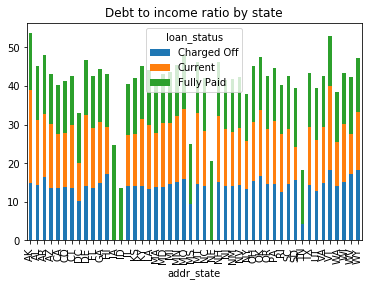

In [111]:
dti_state.plot(kind="bar", stacked=True)
plt.title('Debt to income ratio by state')
plt.show()

In [89]:
#Debt ratio by issue month
pd.pivot_table(data=data, values="loan_amnt", index="issue_month", columns="loan_status", aggfunc=sum)

loan_status,Charged Off,Current,Fully Paid
issue_month,,,
Apr,4253500.0,34550.0,25496250.0
Aug,5146175.0,1832200.0,30937050.0
Dec,8536450.0,3946625.0,40642275.0
Feb,2837100.0,NaN,20165450.0
Jan,3140875.0,NaN,20108925.0
Jul,5322200.0,1971775.0,28282000.0
Jun,5247175.0,1538425.0,27319725.0
Mar,3665800.0,9000.0,23739950.0
May,5093275.0,1035825.0,25592650.0


In [94]:
loan_month=pd.pivot_table(data=data, values="loan_amnt", index="issue_month", columns="loan_status", aggfunc=sum)

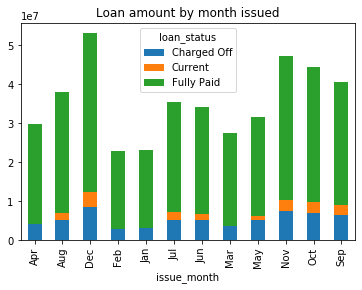

In [95]:
loan_month.plot(kind="bar", stacked=True)
plt.title('Loan amount by month issued')
plt.show()

### Bankruptcies and tax liens

In [117]:
data.pub_rec_bankruptcies.value_counts()

0.0    36262
1.0     1554
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

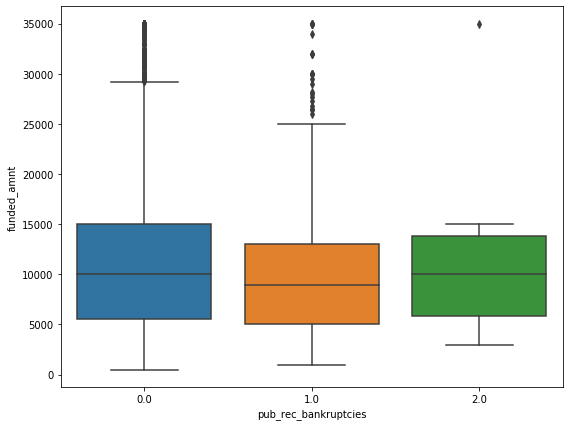

In [116]:
plt.figure(figsize=[9,7])
sns.boxplot(data.pub_rec_bankruptcies, data.funded_amnt)
plt.show()

In [118]:
pd.pivot_table(data=data, values="loan_amnt", index="loan_status", columns="pub_rec_bankruptcies")

pub_rec_bankruptcies,0.0,1.0,2.0
loan_status,,,
Charged Off,12328.223157,11775.533537,12500.000000
Current,17296.095955,13053.030303,25000.000000
Fully Paid,11021.049031,9578.394803,4866.666667


In [120]:
loan_bankruptcies=pd.pivot_table(data=data, values="loan_amnt", index="loan_status", columns="pub_rec_bankruptcies")

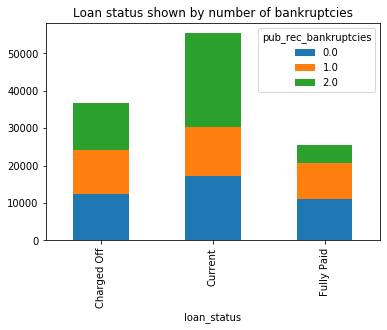

In [122]:
loan_bankruptcies.plot(kind="bar", stacked=True)
plt.title('Loan status shown by number of bankruptcies')
plt.show()

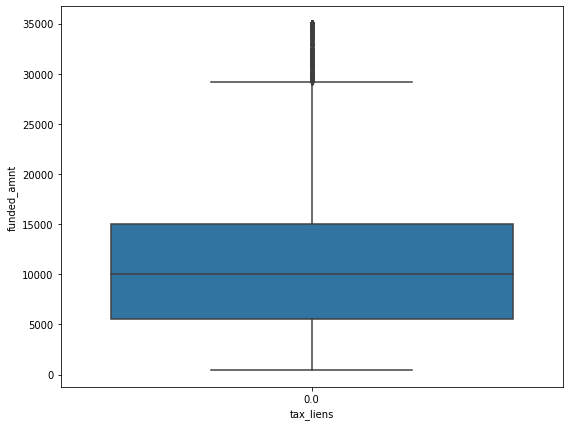

In [123]:
plt.figure(figsize=[9,7])
sns.boxplot(data.tax_liens, data.funded_amnt)
plt.show()

### Revolving account Utilization 

In [126]:
data.revol_util.value_counts()

0.00     904
0.20      59
63.00     56
66.60     56
40.70     56
61.00     56
70.40     55
0.10      55
31.20     55
64.80     55
46.40     55
66.70     55
32.00     54
37.60     54
68.60     53
48.90     53
57.40     53
46.60     53
27.20     53
68.70     53
70.80     53
78.70     53
65.90     52
62.80     52
64.60     52
76.60     52
45.60     52
41.00     52
49.80     52
51.60     52
70.10     52
66.10     51
48.20     51
74.90     51
48.00     51
25.50     51
54.60     51
55.50     51
75.50     51
89.50     51
66.90     51
60.20     50
51.50     50
35.70     50
29.10     50
55.80     50
64.30     50
41.60     50
54.30     50
43.40     50
72.10     50
23.70     49
36.50     49
88.00     49
45.90     49
55.10     49
58.70     49
47.80     49
89.90     49
30.90     49
53.90     49
55.20     49
62.30     49
35.30     49
57.80     48
52.40     48
73.20     48
7.20      48
52.30     48
54.00     48
47.40     48
87.60     48
40.20     48
49.10     48
44.70     48
57.90     48
59.60     48

In [127]:
data['Rev_util_Bucket'] = pd.qcut(data.revol_util, [0, 0.2, 0.4, 0.6, 0.8, 1], ["VL","L","M","H","VH"])

In [128]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,delinq_amnt,pub_rec_bankruptcies,tax_liens,issue_month,issue_year,credit_oldest_month,credit_oldest_year,credit_years,age,Rev_util_Bucket
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,0,0.0,0.0,Dec,2011,Jan,1985,26,46,VH
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,0,0.0,0.0,Dec,2011,Apr,1999,12,32,VL
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,0,0.0,0.0,Dec,2011,Nov,2001,10,30,VH
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,0,0.0,0.0,Dec,2011,Feb,1996,15,35,L
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,0,0.0,0.0,Dec,2011,Jan,1996,15,35,M


In [235]:
pd.pivot_table(data=data, index="addr_state", columns="loan_status", values="Rev_util_Bucket", aggfunc="count")

loan_status,Charged Off,Current,Fully Paid
addr_state,,,
AK,15.0,2.0,60.0
AL,49.0,16.0,360.0
AR,26.0,9.0,197.0
AZ,113.0,28.0,677.0
CA,1032.0,143.0,5627.0
CO,87.0,26.0,633.0
CT,86.0,24.0,610.0
DC,14.0,3.0,192.0
DE,11.0,1.0,96.0


In [236]:
rev_util_state_count=pd.pivot_table(data=data, index="addr_state", columns="loan_status", values="Rev_util_Bucket", aggfunc="count")

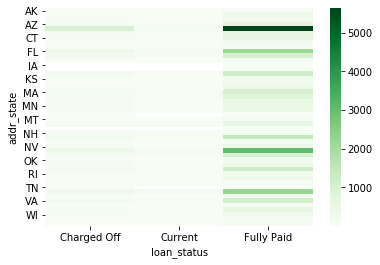

In [237]:
sns.heatmap(rev_util_state_count,cmap = "Greens")
plt.show()

In [ ]:
pd.pivot_table(data=data, index="loan_status", columns="Rev_util_Bucket", values="revol_util", aggfunc="count")

In [228]:
rev_util_count=pd.pivot_table(data=data, index="loan_status", columns="Rev_util_Bucket", values="revol_util", aggfunc="count")

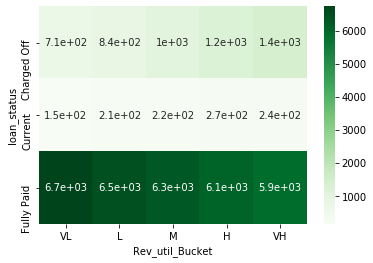

In [229]:
sns.heatmap(rev_util_count,cmap = "Greens", annot=True)
plt.show()

In [146]:
pd.pivot_table(data=data, index="loan_status", columns="Rev_util_Bucket", values="revol_util", aggfunc=np.mean)

Rev_util_Bucket,VL,L,M,H,VH
loan_status,,,,,
Charged Off,8.606506,31.124443,49.801702,68.243894,88.660234
Current,9.312905,30.992381,49.826786,67.765441,87.967213
Fully Paid,9.112176,30.741087,49.713313,67.995613,88.024873


In [221]:
Rev_util_loan=pd.pivot_table(data=data, index="loan_status", columns="Rev_util_Bucket", values="revol_util", aggfunc=np.mean)

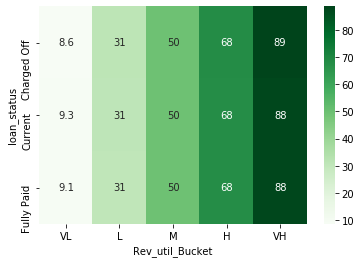

In [222]:
##Plot a heat map
sns.heatmap(Rev_util_loan,cmap = "Greens", annot=True)
plt.show()

In [149]:
pd.pivot_table(data=data, index="loan_status", columns="Rev_util_Bucket", values="loan_amnt", aggfunc=np.median)

Rev_util_Bucket,VL,L,M,H,VH
loan_status,,,,,
Charged Off,9250,10000,10800,10750,10000
Current,14000,15000,16000,17000,16000
Fully Paid,8000,9000,10000,10000,9600


In [160]:
revol_util_amount=pd.pivot_table(data=data, index="loan_status", columns="Rev_util_Bucket", values="loan_amnt", aggfunc=np.median)

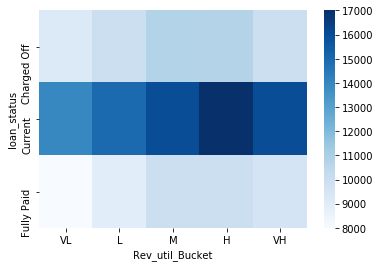

In [161]:
sns.heatmap(revol_util_amount,cmap = "Blues")
plt.show()

In [246]:
pd.pivot_table(data=data, index="term", columns="loan_status", values="revol_util", aggfunc="count")

loan_status,Charged Off,Current,Fully Paid
term,,,
36,2894.0,NaN,24595.0
60,2307.0,1098.0,6929.0


In [250]:
term_revol_util=pd.pivot_table(data=data, index="term", columns="loan_status", values="revol_util", aggfunc=np.mean)

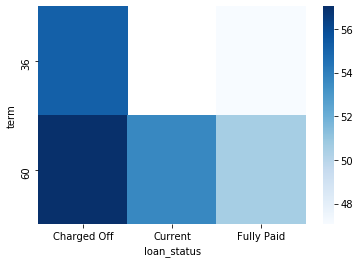

In [251]:
sns.heatmap(term_revol_util,cmap = "Blues")
plt.show()

In [154]:
pd.pivot_table(data=data, index="loan_status", columns="term", values="revol_util", aggfunc=np.mean)

term,36,60
loan_status,,
Charged Off,55.180311,57.035410
Current,NaN,53.683160
Fully Paid,47.071149,50.550227


In [155]:
term_revol_util=pd.pivot_table(data=data, index="loan_status", columns="term", values="revol_util", aggfunc=np.mean)

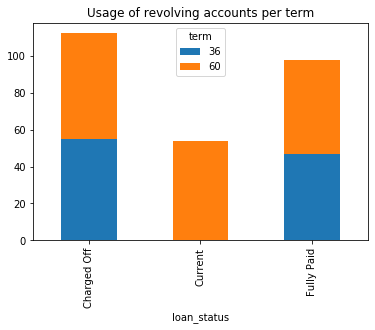

In [156]:
term_revol_util.plot(kind="bar", stacked=True)
plt.title('Usage of revolving accounts per term')
plt.show()

In [170]:
data.annual_inc.describe()

count    3.782300e+04
mean     6.967727e+04
std      6.365142e+04
min      4.000000e+03
25%      4.190200e+04
50%      6.000000e+04
75%      8.355000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [162]:
pd.pivot_table(data=data, index="loan_status", columns="Rev_util_Bucket", values="annual_inc", aggfunc=np.median)

Rev_util_Bucket,VL,L,M,H,VH
loan_status,,,,,
Charged Off,49896.0,50000.0,56000.0,54000.0,57021.5
Current,60998.0,62450.0,63802.0,70000.0,69498.0
Fully Paid,60000.0,58000.0,60000.0,60000.0,61200.0


In [171]:
annual_income_revl=pd.pivot_table(data=data, index="loan_status", columns="Rev_util_Bucket", values="annual_inc", aggfunc=np.median)

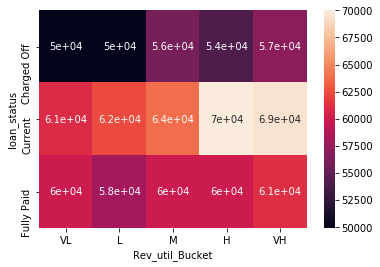

In [210]:
sns.heatmap(annual_income_revl, annot=True)
plt.show()

### Correlation Matrix

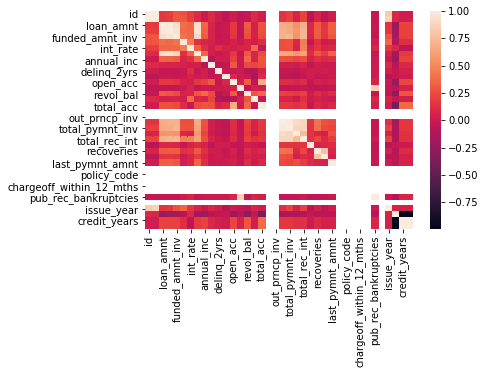

In [196]:
sns.heatmap(defaulted.corr(), fmt=".1g")
plt.show()

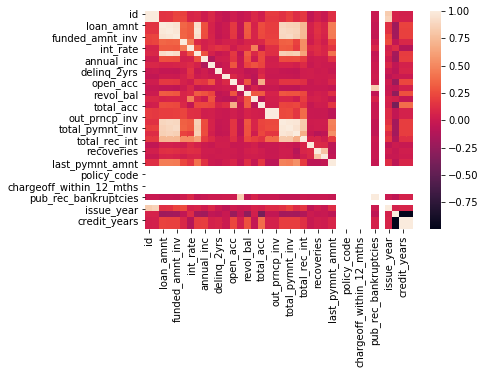

In [197]:
sns.heatmap(data.corr(), fmt=".1g")
plt.show()